In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
from matplotlib.patches import Ellipse

In [70]:
#df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\AllCvAllT\\Scores_Para_-24h.xlsx', sheet_name='Sheet1')
df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\AllCvAllT\\Orth_Scores.csv')#

In [67]:
df

,Label,sample,trt_time,sample1,orient,spectra_num,Include,Class,Cross-validation Sets,Scores on PC 1 (4.01%),Scores on PC 2 (3.31%),Scores on PC 3 (3.08%),Scores on PC 4 (2.77%),Scores on PC 5 (2.58%),Q Residuals (84.25%),Hotelling T^2 (15.75%),Q Residuals Reduced (p=0.950) (84.25%),Hotelling T^2 Reduced (p=0.950) (15.75%),KNN Score Distance (k=3)
0,20250429,Ctrl,20mins,Ctrl,Orth,1,1,Ctrl,Leave-Out Set 1,-0.033274,-0.600721,0.110030,0.199152,0.072251,1.061424,3.447327,0.262148,0.301308,0.134312
1,20250429,Ctrl,20mins,Ctrl,Orth,2,1,Ctrl,Leave-Out Set 2,0.022221,-0.593847,0.004297,0.086848,0.245728,1.134072,3.534199,0.280091,0.308901,0.137475
2,20250429,Ctrl,20mins,Ctrl,Orth,3,1,Ctrl,Leave-Out Set 3,0.248073,-0.455320,0.376253,0.197784,-0.022808,1.932773,3.678698,0.477352,0.321531,0.136885
3,20250429,Ctrl,20mins,Ctrl,Orth,4,1,Ctrl,Leave-Out Set 4,0.188151,0.023304,0.325228,-0.142444,0.349280,3.565439,2.608199,0.880584,0.227966,0.094760
4,20250429,Ctrl,20mins,Ctrl,Orth,5,1,Ctrl,Leave-Out Set 5,0.280288,-0.081789,0.346797,-0.046120,0.231311,3.105751,2.187397,0.767051,0.191186,0.106491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,20250609,Trt,60mins,60mins,Orth,5,1,60mins,Leave-Out Set 4,-0.514933,-0.203057,-0.354296,0.340692,-0.129608,4.369309,4.465863,1.079122,0.390332,0.145969
245,20250609,Trt,60mins,60mins,Orth,7,1,60mins,Leave-Out Set 5,-0.450216,-0.273656,-0.489256,0.908658,-0.161669,8.041447,12.218640,1.986058,1.067952,0.289947
246,20250609,Trt,60mins,60mins,Orth,9,1,60mins,Leave-Out Set 6,-0.607809,0.320100,-0.229989,0.558447,-0.002457,7.169961,6.731555,1.770821,0.588362,0.169122
247,20250609,Trt,60mins,60mins,Orth,11,1,60mins,Leave-Out Set 7,-0.411709,-0.359572,-0.259999,-0.042484,0.056362,2.852396,2.799303,0.704478,0.244669,0.111993


In [24]:
df_mean = df.groupby(['Label','trt_time','Class', 'Class1']).mean(numeric_only=True).reset_index()
df_mean.head()

,Label,trt_time,Class,Class1,spectra_num,Include,Scores on PC 1 (7.47%),Scores on PC 2 (2.92%),Scores on PC 3 (2.91%),Scores on PC 4 (2.82%),Scores on PC 5 (2.77%),Q Residuals (81.11%),Hotelling T^2 (18.89%),Q Residuals Reduced (p=0.950) (81.11%),Hotelling T^2 Reduced (p=0.950) (18.89%),KNN Score Distance (k=3)
0,20250429,20mins,Ctrl,Control,3.5,1.0,-0.397476,-0.228690,0.199513,0.026089,0.401451,2.547192,8.606303,0.863336,0.676737,0.616161
1,20250429,20mins,Trt,Cross-Linked,3.5,1.0,0.248802,-0.105064,-0.151140,0.037659,0.118439,2.057828,4.464074,0.697473,0.351022,0.406677
2,20250429,20mins24h,Trt-24h,Trt-24h,3.5,0.0,0.017082,-0.171860,0.086154,-0.043584,0.109416,6.367250,2.564607,2.158093,0.201662,0.421167
3,20250429,2mins,Ctrl,Control,3.5,1.0,0.481409,-0.357069,0.258827,0.152291,-0.174246,3.810202,6.867490,0.860321,0.537337,0.452676
4,20250429,2mins,Trt,Cross-Linked,3.5,1.0,-0.792457,-0.399876,0.406382,-0.144113,0.068572,1.789707,5.966912,0.404105,0.466873,0.280432


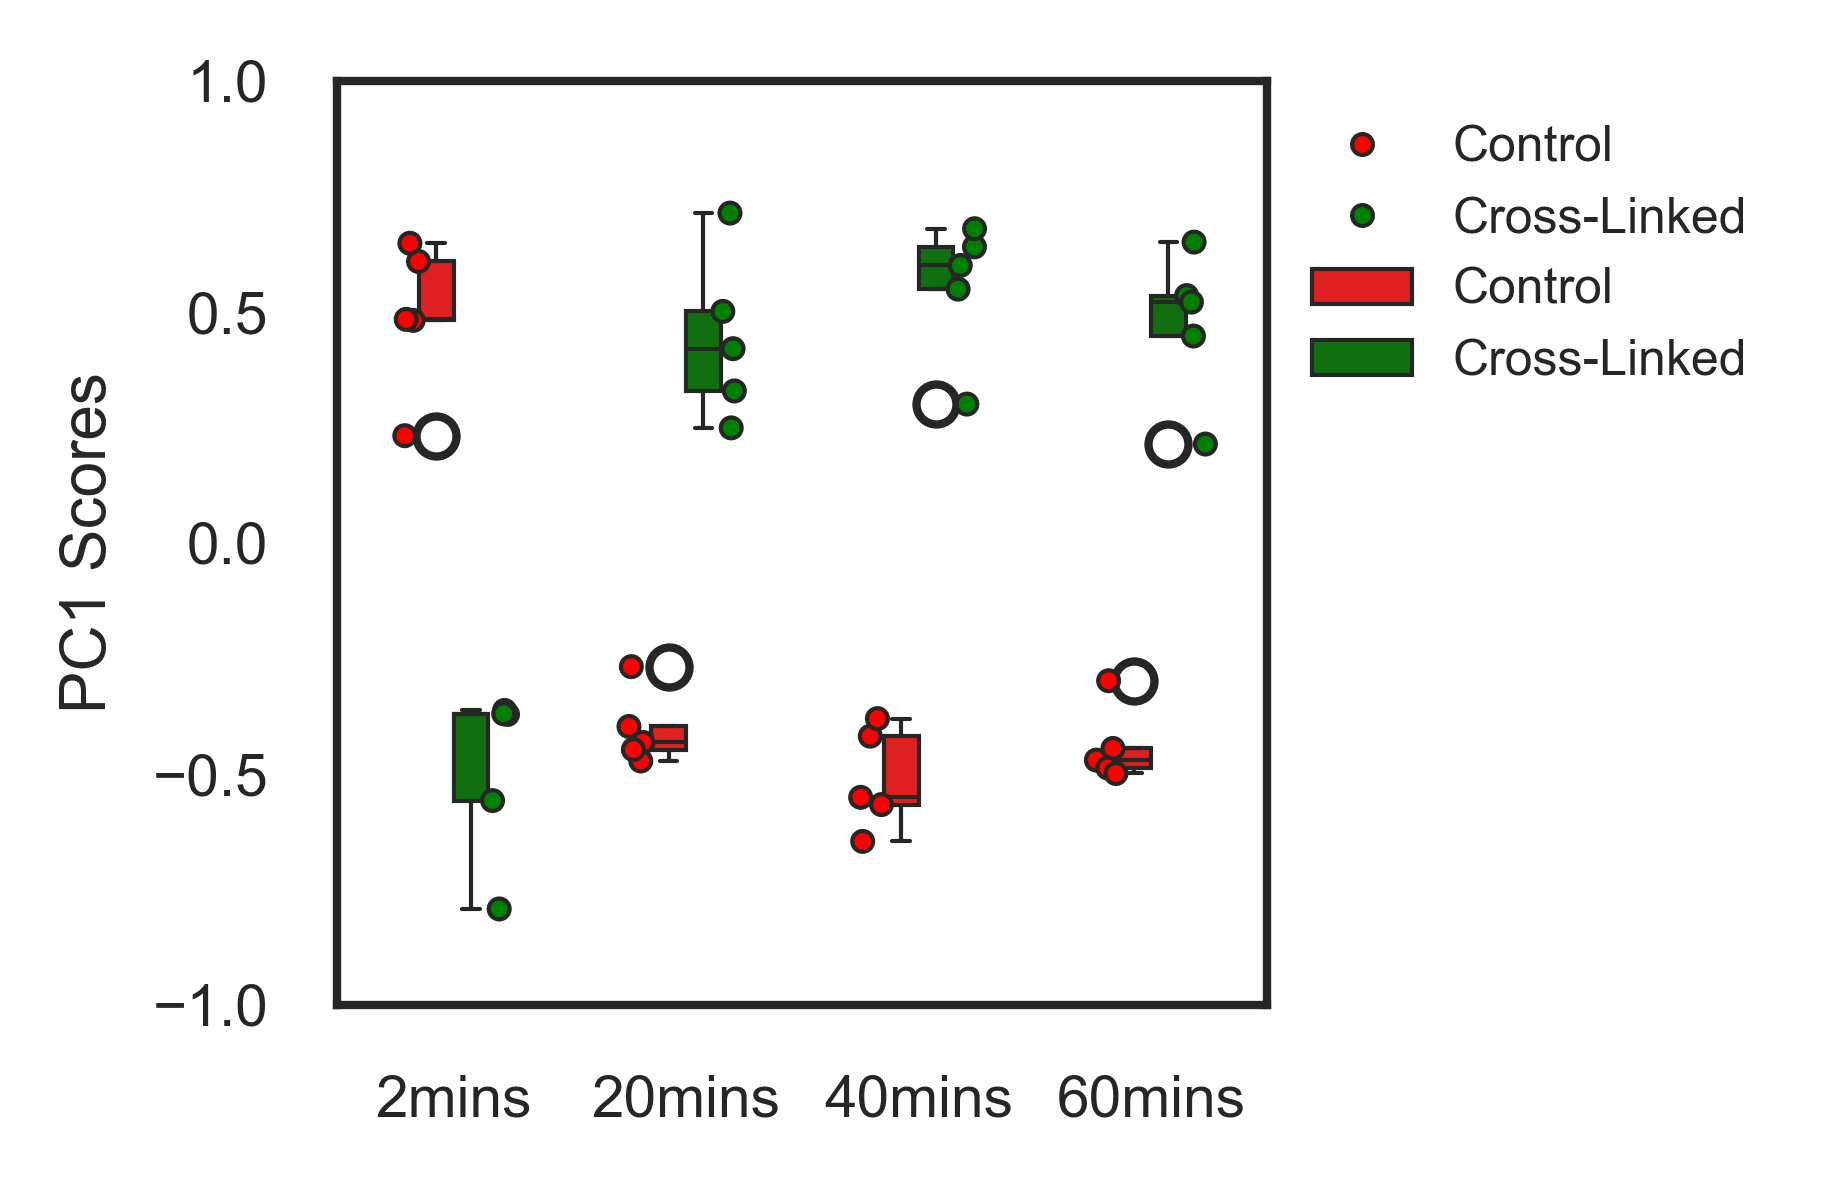

In [26]:
plt.figure(figsize = (2, 2), dpi = 600)
d_mean = df_mean[df_mean['trt_time'].isin(['2mins', '20mins', '40mins', '60mins'])]
sns.set_theme(context = 'paper', font_scale = .8, style = 'white', rc={"patch.linewidth": 1.0})
sns.stripplot(
    x = 'trt_time',
    y = 'Scores on PC 1 (7.47%)',
    data = d_mean,
    hue = 'Class1',
    linewidth = .5,
    edgecolor='auto',
    palette = ['red', 'green'],
    dodge = .5,
    order = ['2mins', '20mins', '40mins', '60mins'],
    size = 2.5
)
sns.boxplot(
     x = 'trt_time',
    y = 'Scores on PC 1 (7.47%)',
    data = d_mean,
    hue = 'Class1',
    palette = ['red', 'green'],
    order = ['2mins', '20mins', '40mins', '60mins'],
    width =.3,
    linewidth=.5,
    dodge = .5
)
'''sns.barplot(
     x = 'trt_time',
    y = 'Scores on PC 1 (7.47%)',
    data = d_mean,
    hue = 'Class1',
    palette = ['red', 'green'],
    order = ['2mins', '20mins', '40mins', '60mins'],
    estimator = 'median',
    errorbar = 'sd'
    #width =.3,
    #linewidth=.5,
    #dodge = .5
)'''
plt.xlabel(''),
plt.ylabel('PC1 Scores')
plt.legend(bbox_to_anchor = (1,1), fontsize = 6, frameon = False)
plt.ylim(-1, 1)
plt.savefig('C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\PCA_Scores_Para_boxplot.tif', dpi = 600, bbox_inches='tight')

In [109]:
for x in ['2mins', '20mins', '40mins', '60mins']:
    stat_df = df[(df['Class1'].isin(['Control', 'Cross-Linked'])) & (df['trt_time'] == x)]
    tukey = pairwise_tukeyhsd(endog = stat_df['Scores on PC 1 (7.47%)'],
                                groups = stat_df['Class1'],
                                    alpha = .01
    )
    print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.01   
 group1    group2    meandiff p-adj lower   upper  reject
---------------------------------------------------------
Control Cross-Linked  -0.9818   0.0 -1.139 -0.8246   True
---------------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.01   
 group1    group2    meandiff p-adj lower  upper  reject
--------------------------------------------------------
Control Cross-Linked   0.8384   0.0 0.7121 0.9646   True
--------------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.01  
 group1    group2    meandiff p-adj lower  upper reject
-------------------------------------------------------
Control Cross-Linked    1.064   0.0 0.9499 1.178   True
-------------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.01   
 group1    group2    meandiff p-adj lower  upper  reject
-------------------------------

plt.figure(figsize = (8, 8), dpi = 150)
sns.scatterplot(
    data = df,
    x = 'Scores on PC 1 (4.94%)',
    y = 'Scores on PC 2 (3.30%)',
    hue = 'Class',
    s = 80,
    hue_order = ['Ctrl', 'Trt', 'Trt-24h'],
    alpha = .89,
    palette = ['red', 'green', 'blue'],
    edgecolor='gray'
)
#plt.figure(figsize = (8, 8), dpi = 150)
sns.scatterplot(
    data = df_mean,
    x = 'Scores on PC 1 (4.94%)',
    y = 'Scores on PC 2 (3.30%)',
    #hue = 'Class',
    s = 200,
    #hue_order = ['Ctrl', 'Trt', 'Trt-24h'],
    color = 'black',
    style='Class',
    markers = ['^', '*', 'X'],
    #alpha = .6
)

In [62]:
# Function to create confidence ellipse
def confidence_ellipse(x, y, ax, n_std=1.8, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
    
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    # Using a special case to obtain the eigenvalues of this two-dimensional dataset
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    
    # Calculating the standard deviation of x from the square root of the variance
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # Calculating the standard deviation of y
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = plt.matplotlib.transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)




In [71]:
df.head()

,Label,sample,trt_time,sample1,orient,spectra_num,Include,Class,Cross-validation Sets,Scores on PC 1 (4.01%),Scores on PC 2 (3.31%),Scores on PC 3 (3.08%),Scores on PC 4 (2.77%),Scores on PC 5 (2.58%),Q Residuals (84.25%),Hotelling T^2 (15.75%),Q Residuals Reduced (p=0.950) (84.25%),Hotelling T^2 Reduced (p=0.950) (15.75%),KNN Score Distance (k=3)
0,20250429,Ctrl,20mins,Control,Orth,1,1,Ctrl,Leave-Out Set 1,-0.033274,-0.600721,0.110030,0.199152,0.072251,1.061424,3.447327,0.262148,0.301308,0.134312
1,20250429,Ctrl,20mins,Control,Orth,2,1,Ctrl,Leave-Out Set 2,0.022221,-0.593847,0.004297,0.086848,0.245728,1.134072,3.534199,0.280091,0.308901,0.137475
2,20250429,Ctrl,20mins,Control,Orth,3,1,Ctrl,Leave-Out Set 3,0.248073,-0.455320,0.376253,0.197784,-0.022808,1.932773,3.678698,0.477352,0.321531,0.136885
3,20250429,Ctrl,20mins,Control,Orth,4,1,Ctrl,Leave-Out Set 4,0.188151,0.023304,0.325228,-0.142444,0.349280,3.565439,2.608199,0.880584,0.227966,0.094760
4,20250429,Ctrl,20mins,Control,Orth,5,1,Ctrl,Leave-Out Set 5,0.280288,-0.081789,0.346797,-0.046120,0.231311,3.105751,2.187397,0.767051,0.191186,0.106491


In [45]:
df[(df['sample1'] == 'Control') & (df['Include'] == 1)][['sample1','Scores on PC 1 (3.71%)', 'Scores on PC 2 (2.62%)']].iloc[:, 1].values.mean()

np.float64(-0.24298273384552846)

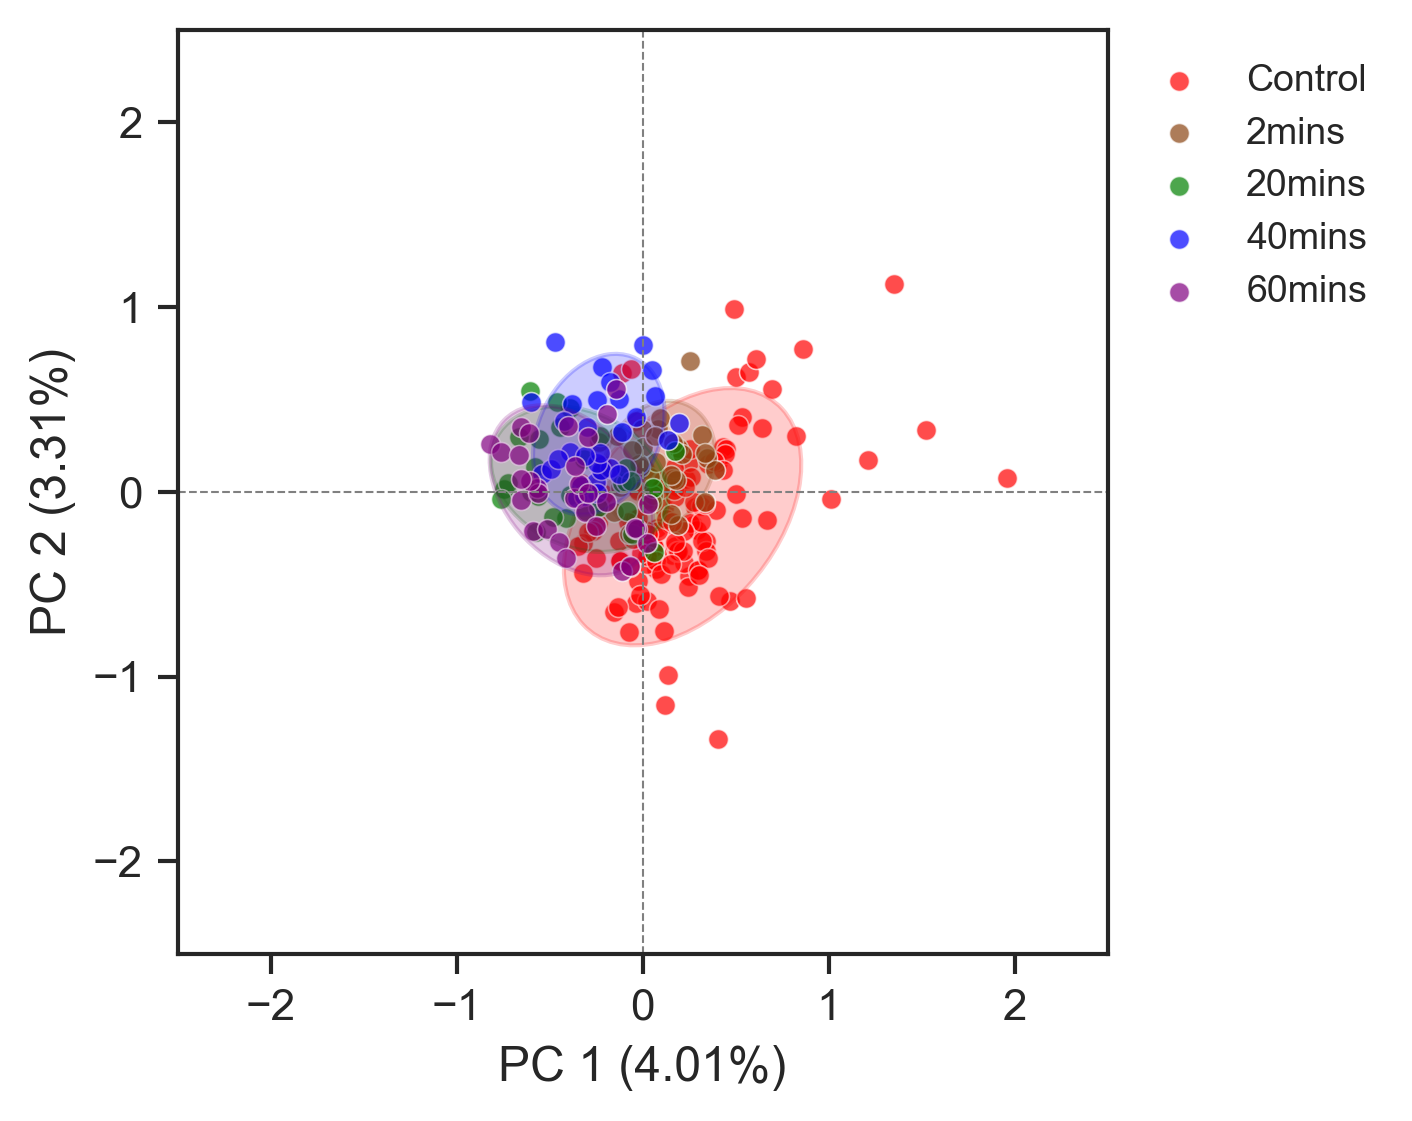

In [73]:
plt.figure(figsize=(4,4), dpi = 300)
sns.set_theme(style = 'ticks', context = 'paper', font_scale=1.2)
grps = ['Control', '2mins', '20mins', '40mins', '60mins']
colors = ['red','saddlebrown','green', 'blue', 'purple']

for g in range(len(grps)):
    data = df[(df['sample1'] == grps[g])][['sample1','Scores on PC 1 (4.01%)', 'Scores on PC 2 (3.31%)']]
    ax = sns.scatterplot(
        x = data.iloc[:, 1],
        y = data.iloc[:, 2],
        #hue = 'sample1',
        data = data,
        color=colors[g],
        label = grps[g],
        alpha = .7
        #hue_order=['Control', '2mins', '20mins', '40mins', '60mins']
    )
    confidence_ellipse(data.iloc[:, 1].values,
                        data.iloc[:, 2].values,
                                ax, n_std=1.8, 
                            edgecolor=colors[g], 
                            linewidth=1, 
                            facecolor=colors[g], 
                            alpha=0.2)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.axvline(0, color = 'gray', ls = '--', lw = 0.5)
plt.axhline(0, color = 'gray', ls = '--', lw = 0.5)
plt.legend(bbox_to_anchor = (1,1), frameon = False, fontsize = 9)
plt.xlabel('PC 1 (4.01%)'), 
plt.ylabel('PC 2 (3.31%)')
plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\PCA_Orth_AllCvAllT.tif', dpi = 600, bbox_inches='tight')

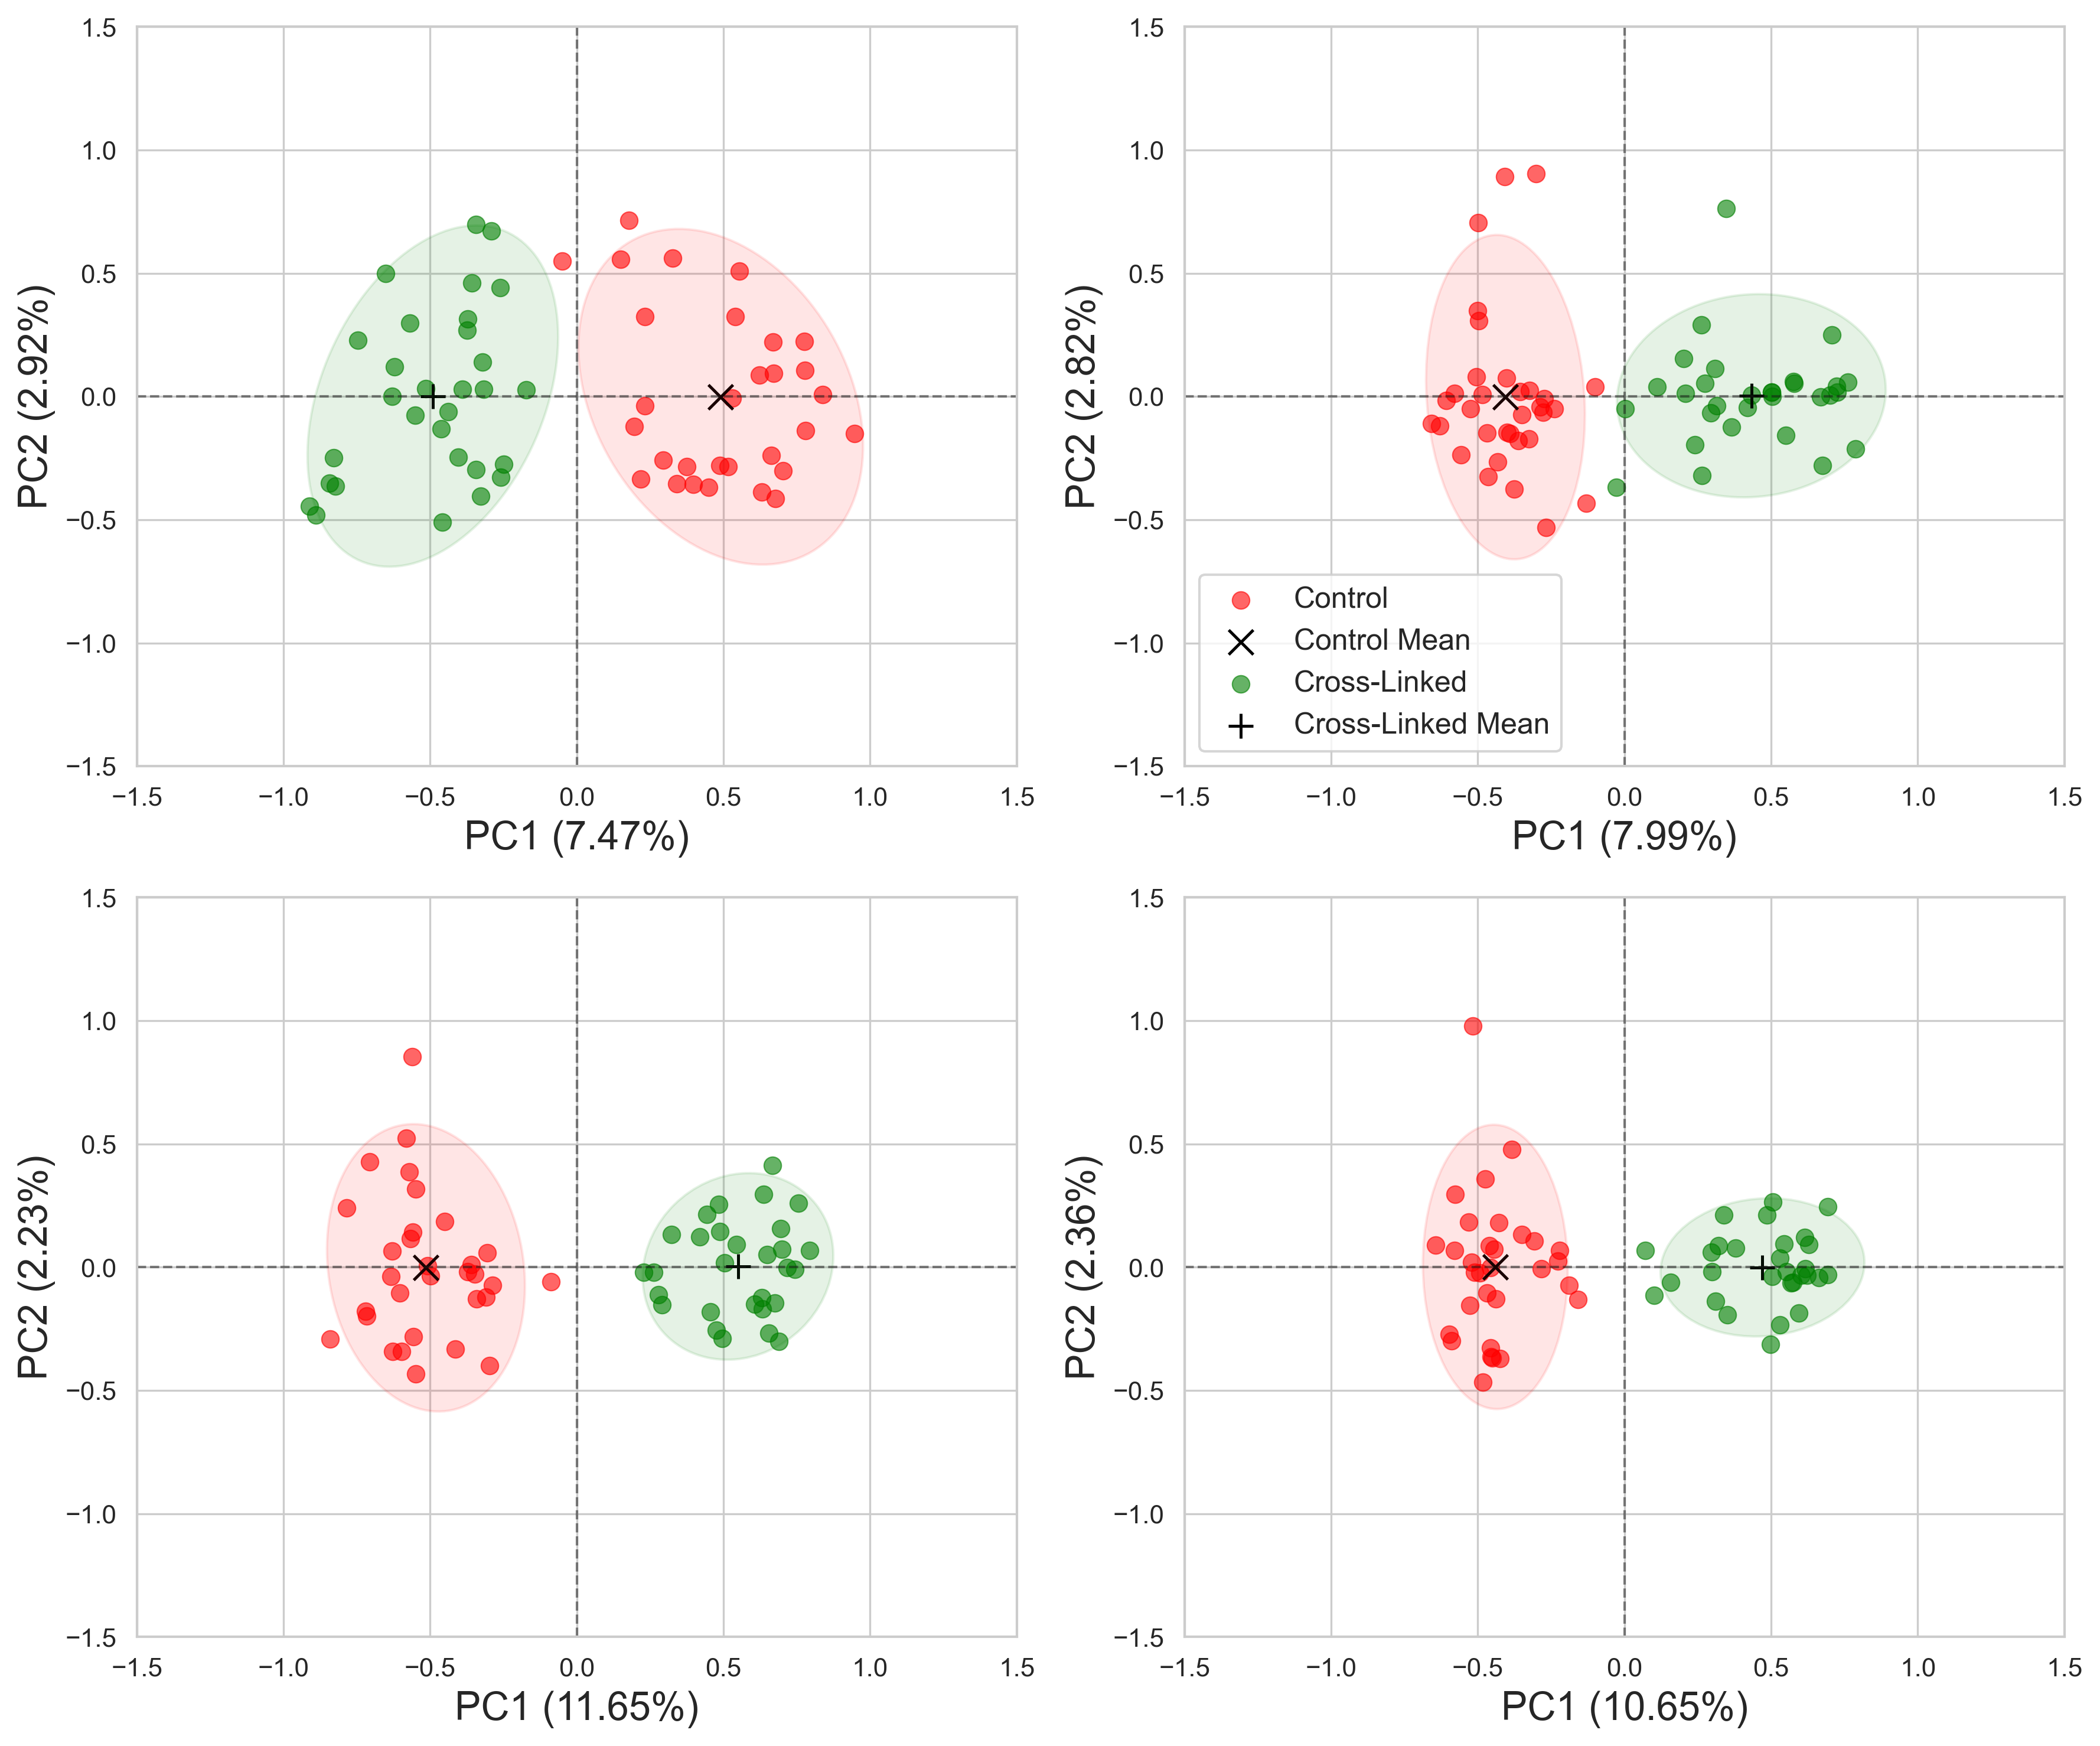

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10), dpi = 300)#, sharex = True, sharey = True)
ax_flat = axes.flatten()


grps = ['Control', 'Cross-Linked']#, 'Trt-24h']
tm = ['2mins', '20mins', '40mins', '60mins']
colors = ['red', 'green', 'blue']
markers = ['x', '+', '^']
#xax = ['5.44%', '9.32%', '9.94%', '8.95%']
#yax = ['3.98%', '2.91%', '3.91%', '2.64%']
xax = ['7.47%', '7.99%', '11.65%', '10.65%']
yax = ['2.92%', '2.82%', '2.23%', '2.36%']
for g in range(len(grps)): 

    for i, ax in enumerate(ax_flat):
        data = df[(df['trt_time']==tm[i]) & (df['Class1'] == grps[g])][['Class','Scores on PC 1 (7.47%)', 'Scores on PC 2 (2.92%)']]
        sns.set_theme(context = 'paper', font_scale = 1.2, style = 'whitegrid', rc={"patch.linewidth": 1.0})
        ax.scatter(data.iloc[:, 1:].values[:, 0], 
                data.iloc[:, 1:].values[:, 1],
                c=colors[g], 
                label=grps[g], 
                alpha=0.6, s=50, 
                #edgecolors='k', 
                linewidth=0.5,
                )
        ax.scatter(
                data.iloc[:, 1:].values[:, 0].mean(), 
                data.iloc[:, 1:].values[:, 1].mean(),
                marker = markers[g],
                color = 'black',
                s=100,
                label = f'{grps[g]} Mean'
                )
        confidence_ellipse(data.iloc[:, 1:].values[:, 0], 
                        data.iloc[:, 1:].values[:, 1], 
                                ax, n_std=2, 
                            edgecolor=colors[g], 
                            linewidth=1, 
                            facecolor=colors[g], 
                            alpha=0.1)
        ax.set_xlabel(f'PC1 ({xax[i]})', fontsize=16)
        ax.set_ylabel(f'PC2 ({yax[i]})', fontsize=16)
        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(-1.5,1.5)
        ax.axvline(0, color = 'k', ls = '--', lw = 1, alpha = .3)
        ax.axhline(0, color = 'k', ls = '--', lw = 1, alpha = .3)
        #ax.set_title(f'PCA ')

        if i == 1:
            ax.legend(fontsize=12, loc='best', )


plt.tight_layout()
plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\PCA_Scores_PC1vPC2_Para.tif', dpi = 600, bbox_inches='tight')
plt.show()


In [76]:
ld = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\Loadings_VIP_colorcoded.xlsx', sheet_name='Orth')
ld

,exp,753.117,754.26,755.404,756.546,757.688,758.831,759.973,761.114,762.256,...,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2,1733.08
0,2mins,-0.033042,-0.030278,-0.027369,-0.024315,-0.021115,-0.017771,-0.014281,-0.010646,-0.005719,...,-0.004239,-0.007469,-0.010776,-0.013695,-0.015889,-0.017692,-0.018619,-0.018705,-0.017173,-0.013647
1,20mins,-0.043052,-0.047513,-0.050904,-0.053223,-0.054472,-0.054649,-0.053756,-0.051793,-0.046721,...,0.008230,0.008732,0.010256,0.012384,0.014570,0.016039,0.017032,0.017224,0.016528,0.015187
2,40mins,0.078312,0.077917,0.076584,0.074315,0.071108,0.066964,0.061883,0.055865,0.045354,...,0.043671,0.043697,0.043423,0.043128,0.042334,0.040874,0.038881,0.036834,0.035075,0.033468
3,60mins,0.034057,0.022742,0.012438,0.003145,-0.005136,-0.012406,-0.018665,-0.023912,-0.026082,...,0.022266,0.023161,0.023940,0.026406,0.027206,0.027154,0.027912,0.029851,0.031868,0.034208
4,24h,0.007840,-0.006896,-0.019664,-0.030462,-0.039291,-0.046152,-0.051043,-0.053965,-0.057078,...,0.030851,0.031147,0.031309,0.031510,0.031889,0.032174,0.031997,0.031249,0.029718,0.027200


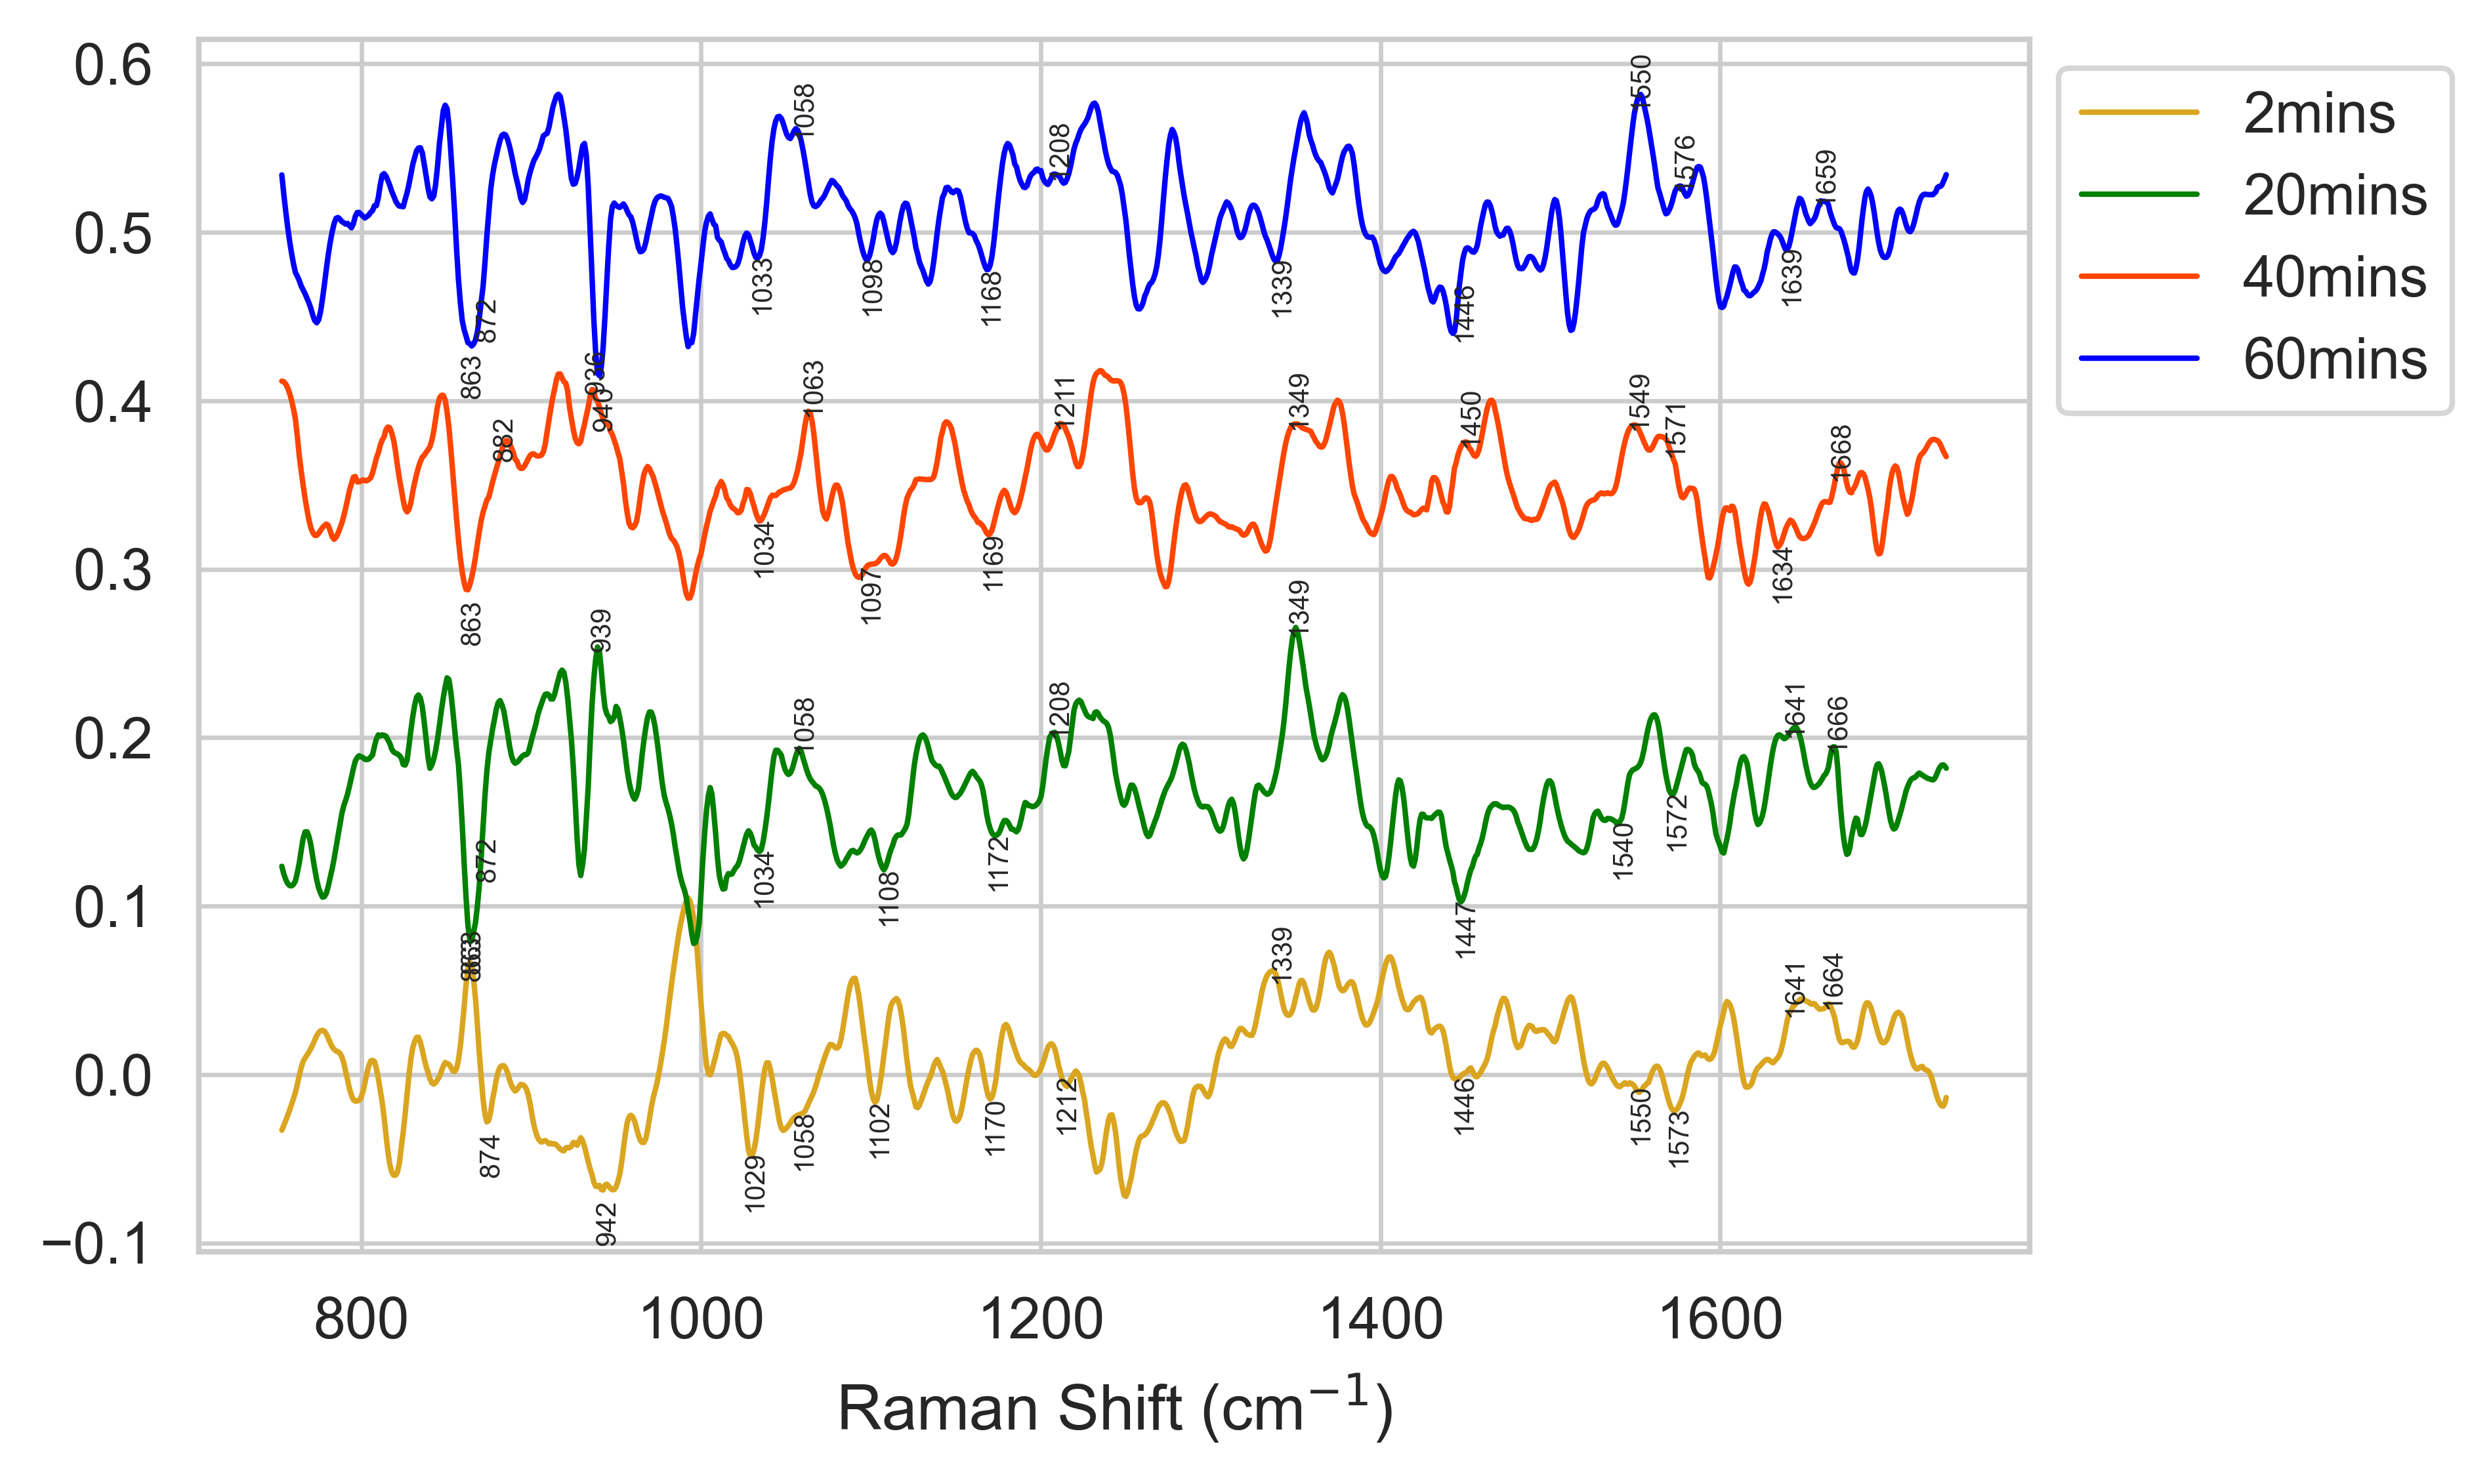

In [77]:
col_map = ['goldenrod','green', 'orangered', 'blue', 'k']
plt.figure(figsize = (6, 4), dpi = 600)
sns.set_theme(context = 'paper', font_scale = 1.2, style = 'whitegrid', rc={"patch.linewidth": 1.0})
for x in range(ld.shape[0]-1):
    sns.lineplot(
        x = ld.columns[1:],
        y = ld.iloc[x, 1:].values + x/6,
        lw = 1,
        color = col_map[x],
        label = ld['exp'][x]
    )
    ctrs = [857, 876, 940, 1033, 1062, 1102, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]
    #orth:  [857, 876, 940, 1033, 1062, 1102, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]
    #para: [876, 1321,1245, 1270,  1381, 1033, 1062, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]
    for c in ctrs:
        #for b in range(0, 4):
        mask = (ld.columns[1:] >= c - 5) & (ld.columns[1:] <= c + 6)

        loc_idx = ld.columns[1:][mask]
        peak_idx = ld.iloc[x, 1:][mask]
            #print(peak_idx.values)

        if (peak_idx.values < 0).any():
                #print(peak_idx.values)
            idx_max = np.argmin(peak_idx)
        else:
            idx_max = np.argmax(peak_idx)
            
        peak_wl = loc_idx[idx_max]
        int_val = peak_idx.values[idx_max]
                        #print(int_val)
        if int_val < 0:
            plt.text(peak_wl + 10, int_val + x/6 - .03,
                                f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')
        else:
            plt.text(peak_wl + 10, int_val + x/6,
                            f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')
    plt.legend(bbox_to_anchor = (1, 1))
    plt.xlabel("Raman Shift (cm$^{-1}$)")

In [6]:
data = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet_Phenorm.xlsx', sheet_name='2mins_Orth')
data.head()

,exp,sample,trt,trt-time,orient,spectra-num,753.117,754.26,755.404,756.546,...,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2,1733.08
0,20250429,Ctrl,Ctrl,2mins,Orth,1,0.632948,0.641236,0.650037,0.659351,...,0.373141,0.370093,0.365495,0.360264,0.354827,0.349059,0.343195,0.337455,0.332725,0.330102
1,20250429,Ctrl,Ctrl,2mins,Orth,2,0.369638,0.400969,0.429757,0.455999,...,0.316936,0.318039,0.320224,0.323649,0.327942,0.332569,0.336941,0.340385,0.342241,0.342132
2,20250429,Ctrl,Ctrl,2mins,Orth,3,0.498138,0.499328,0.502070,0.506365,...,0.307868,0.322777,0.334448,0.343387,0.349061,0.351311,0.348437,0.340934,0.331773,0.320846
3,20250429,Ctrl,Ctrl,2mins,Orth,4,0.321617,0.404753,0.481346,0.551397,...,0.335874,0.317040,0.298768,0.282959,0.271163,0.264695,0.264132,0.269667,0.280593,0.296079
4,20250429,Ctrl,Ctrl,2mins,Orth,5,0.663914,0.718932,0.770345,0.818150,...,0.452609,0.449387,0.445556,0.441208,0.436307,0.430385,0.423872,0.416589,0.409198,0.402786


In [7]:
data_mean = data.groupby(['trt', 'trt-time']).mean(numeric_only=True).drop(['exp', 'spectra-num'], axis=1).reset_index()
data_mean

,trt,trt-time,753.117,754.26,755.404,756.546,757.688,758.831,759.973,761.114,...,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2,1733.08
0,Ctrl,2mins,0.558845,0.620496,0.675968,0.725262,0.768376,0.805313,0.836070,0.860649,...,0.384087,0.384356,0.384489,0.384683,0.385229,0.385381,0.385343,0.384796,0.383985,0.384078
1,Trt,2mins,0.562164,0.628469,0.687813,0.740198,0.785622,0.824086,0.855590,0.880134,...,0.384785,0.389566,0.394193,0.398235,0.401365,0.403503,0.404265,0.403439,0.400517,0.396298
2,Trt-24h,2mins24h,0.581576,0.641988,0.695426,0.741888,0.781374,0.813886,0.839422,0.857983,...,0.402203,0.401524,0.399232,0.398810,0.400002,0.400661,0.401706,0.402516,0.403117,0.403316


In [17]:
ldg = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\2min_Orth_Ldgs.csv')
ldg.head()

,exp,PC 1 (5.44%),PC 2 (3.89%),PC 3 (3.80%),PC 4 (3.72%),PC 5 (3.49%),Q Residuals (79.67%),Hotelling T^2 (20.33%)
0,753.117,-0.033042,0.004206,0.031280,0.000273,0.074449,0.649600,7.416947
1,754.260,-0.030278,0.007357,0.032307,0.005156,0.076889,0.418768,7.730394
2,755.404,-0.027369,0.010235,0.033190,0.009560,0.078668,0.294468,8.004948
3,756.546,-0.024315,0.012842,0.033930,0.013486,0.079788,0.243674,8.218631
4,757.688,-0.021115,0.015176,0.034527,0.016934,0.080247,0.238661,8.354015


In [9]:
ldgs = ldg.set_index('exp')

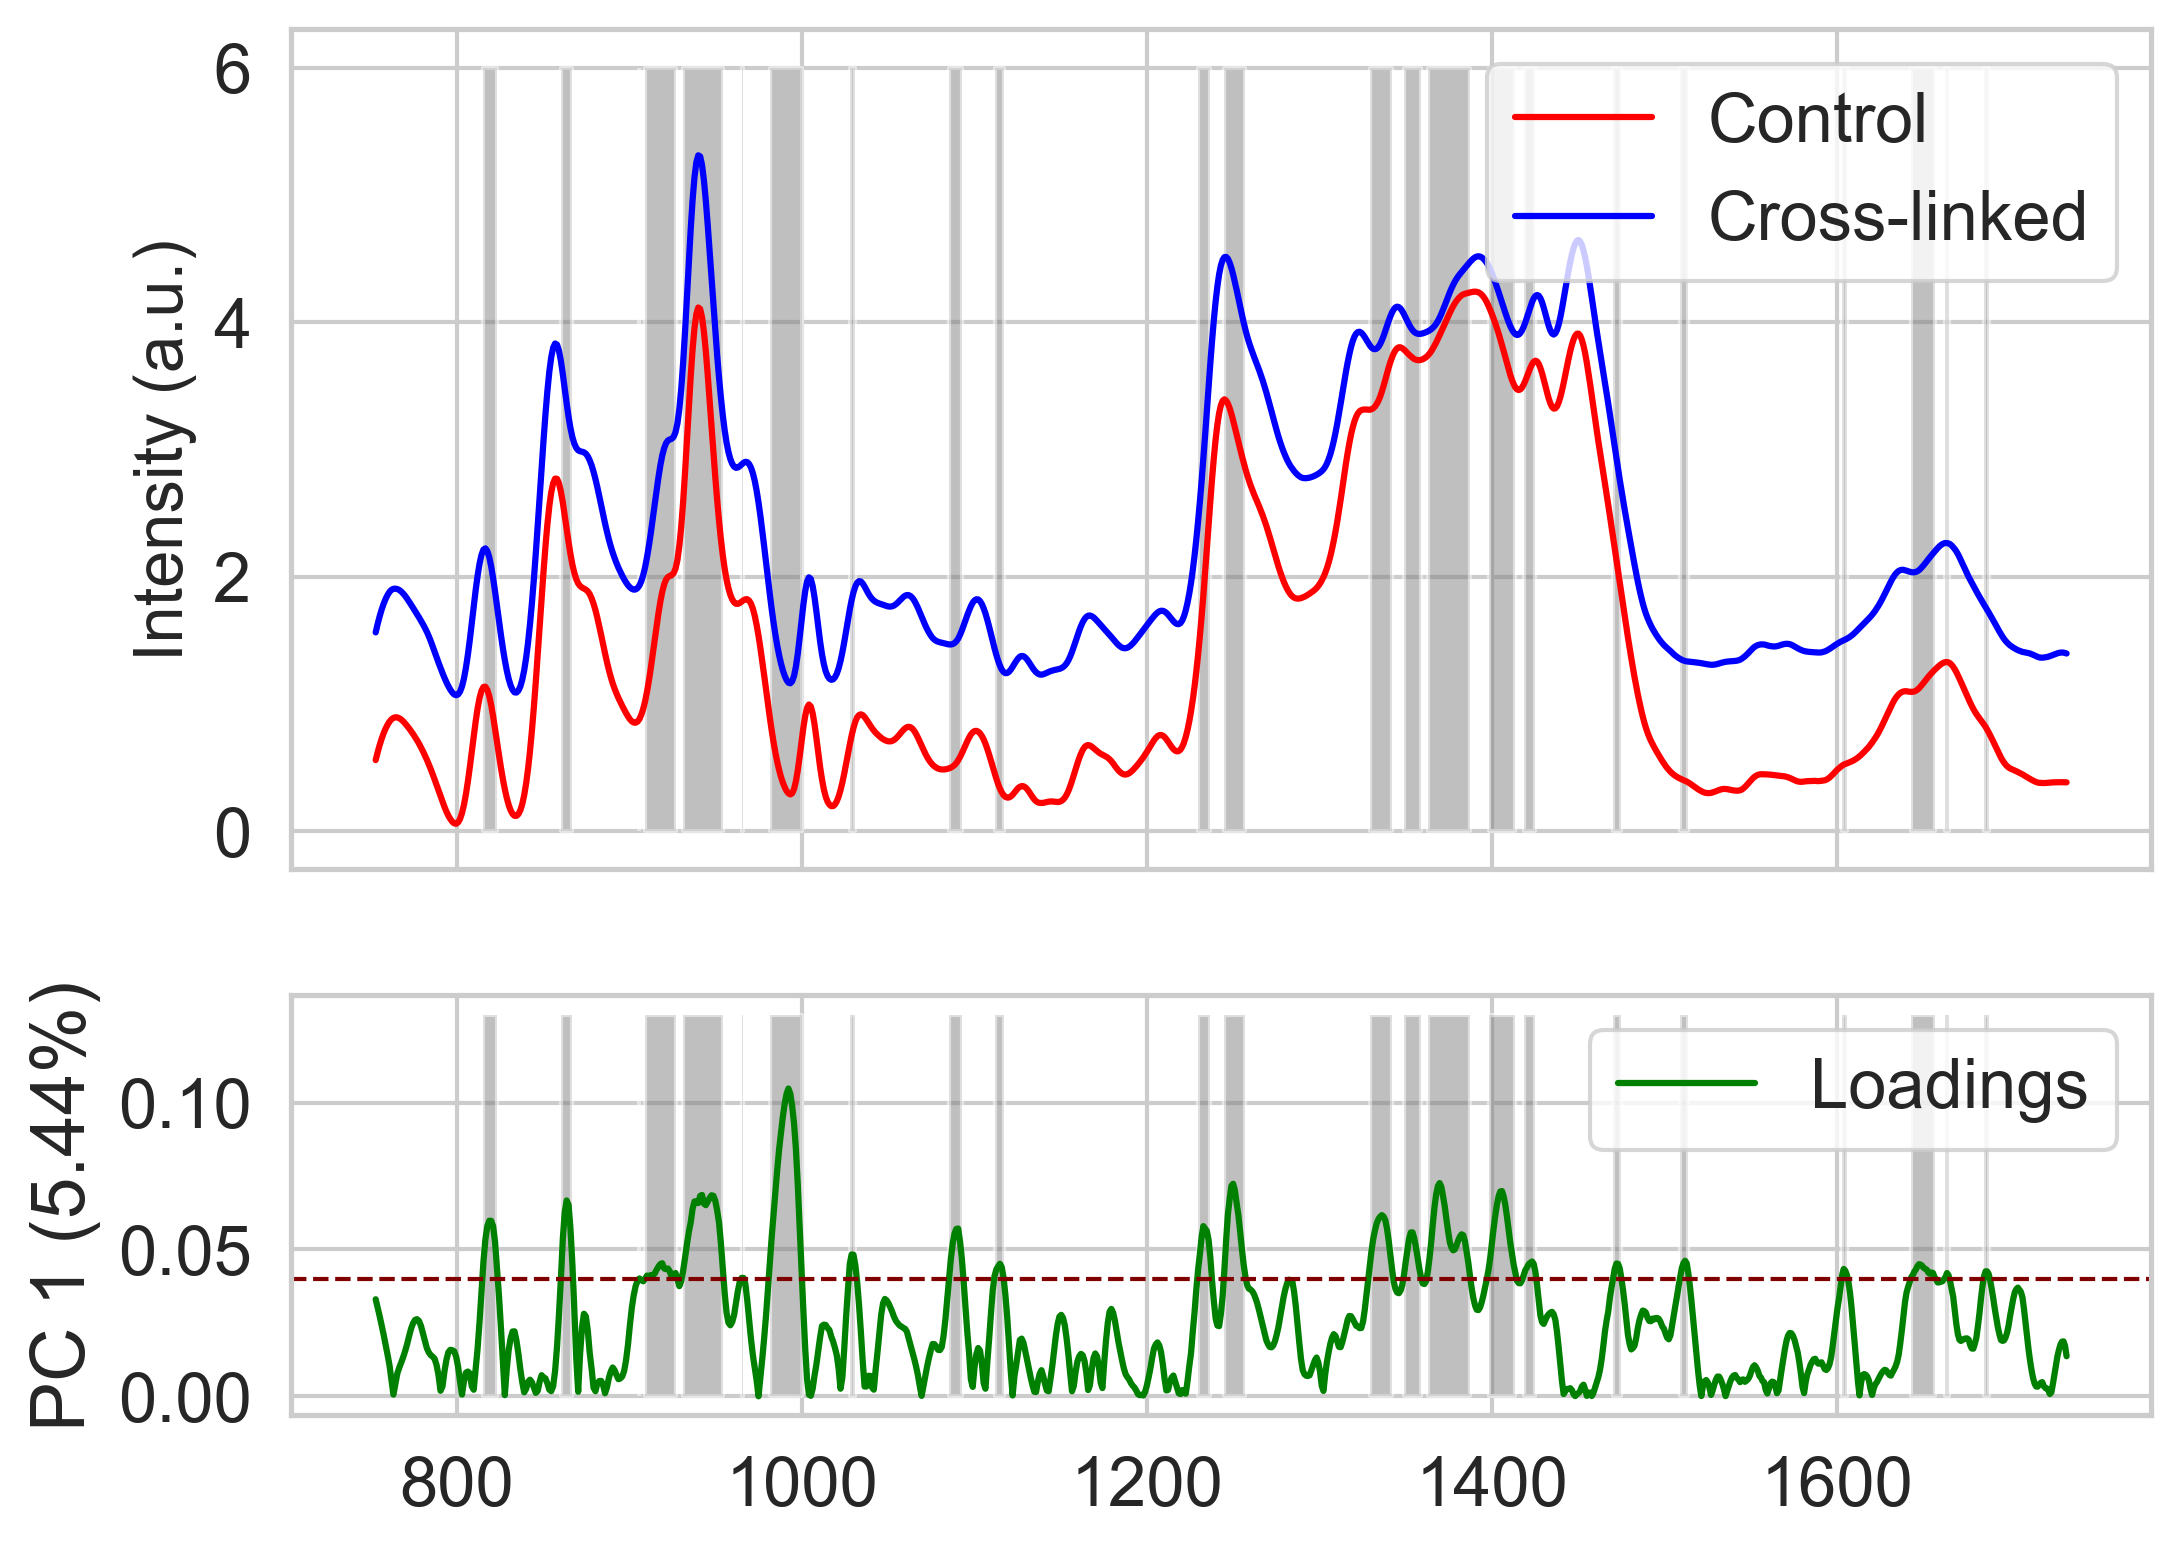

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), dpi = 300, sharex = True, gridspec_kw={'height_ratios': [2, 1]})
sns.lineplot(
    x = data_mean.columns[2:].values.astype(float),
    y = data_mean.iloc[0, 2:],
    label = 'Control',
    color = 'red',
    ax = ax[0]
)
sns.lineplot(
    x = data_mean.columns[2:].values.astype(float),
    y = data_mean.iloc[1, 2:]+1,
    label = 'Cross-linked',
    color = 'blue',
    ax  =ax[0]
)
ax[0].set_ylabel('Intensity (a.u.)', fontsize = 16)
ax[0].legend(loc = 'best')
sns.lineplot(
    x = data_mean.columns[2:].values.astype(float),
    y = np.abs(ldg['PC 1 (5.44%)']),
    label = 'Loadings',
    color = 'green',
    ax  =ax[1]
)
ax[1].axhline(0.04, #ldg['PC 1 (5.44%)'].mean(),
               color = 'maroon', ls = '--', lw = 1)
ax[1].legend(loc = 'best')
ax[1].fill_between(ldgs.index, .13, where=np.abs(ldg['PC 1 (5.44%)']) >= 0.04, facecolor='gray', alpha=.5)
ax[0].fill_between(ldgs.index, 6, where=np.abs(ldg['PC 1 (5.44%)']) >= 0.04, facecolor='gray', alpha=.5)

In [44]:
range(len(ldg['exp'])), 

(range(0, 1024),)

In [12]:
ldgs.iloc[:, 0].mean() #> 0.04

np.float64(0.007493508088386432)

In [88]:
ld = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\Loadings_VIP_colorcoded.xlsx', sheet_name='Para')
ld.index = ld['exp']
ld = ld.drop('exp', axis=1)
ld

,753.117,754.260,755.404,756.546,757.688,758.831,759.973,761.114,762.256,763.397,...,1724.280,1725.160,1726.040,1726.920,1727.800,1728.680,1729.560,1730.440,1731.320,1732.200
exp,,,,,,,,,,,,,,,,,,,,,
2mins,-0.064757,-0.037566,-0.013968,0.006035,0.022445,0.035261,0.044483,0.050112,0.050021,0.046518,...,-0.022298,-0.027105,-0.032256,-0.036049,-0.036832,-0.034401,-0.029371,-0.023417,-0.016951,-0.010766
20mins,0.082980,0.072297,0.062743,0.054317,0.047019,0.040850,0.035809,0.031896,0.031795,0.033506,...,0.025316,0.023663,0.022679,0.021803,0.021757,0.020637,0.018524,0.016460,0.015855,0.015380
40mins,0.094486,0.083924,0.073681,0.063758,0.054156,0.044873,0.035911,0.027268,0.019277,0.011625,...,0.006634,0.009542,0.013594,0.017035,0.020323,0.023439,0.025837,0.027224,0.027283,0.026979
60mins,0.058172,0.051102,0.044455,0.038230,0.032428,0.027048,0.022092,0.017558,0.011719,0.007844,...,0.049620,0.045032,0.040622,0.035833,0.031891,0.026402,0.021659,0.018288,0.016895,0.016112
24h,0.121411,0.095070,0.071889,0.051867,0.035006,0.021305,0.010764,0.003384,0.006388,0.009219,...,0.068717,0.068610,0.066301,0.061951,0.055545,0.048017,0.040198,0.033268,0.027401,0.023052


In [89]:
ld.mean(axis=1).mean()

np.float64(0.0073662213952674915)

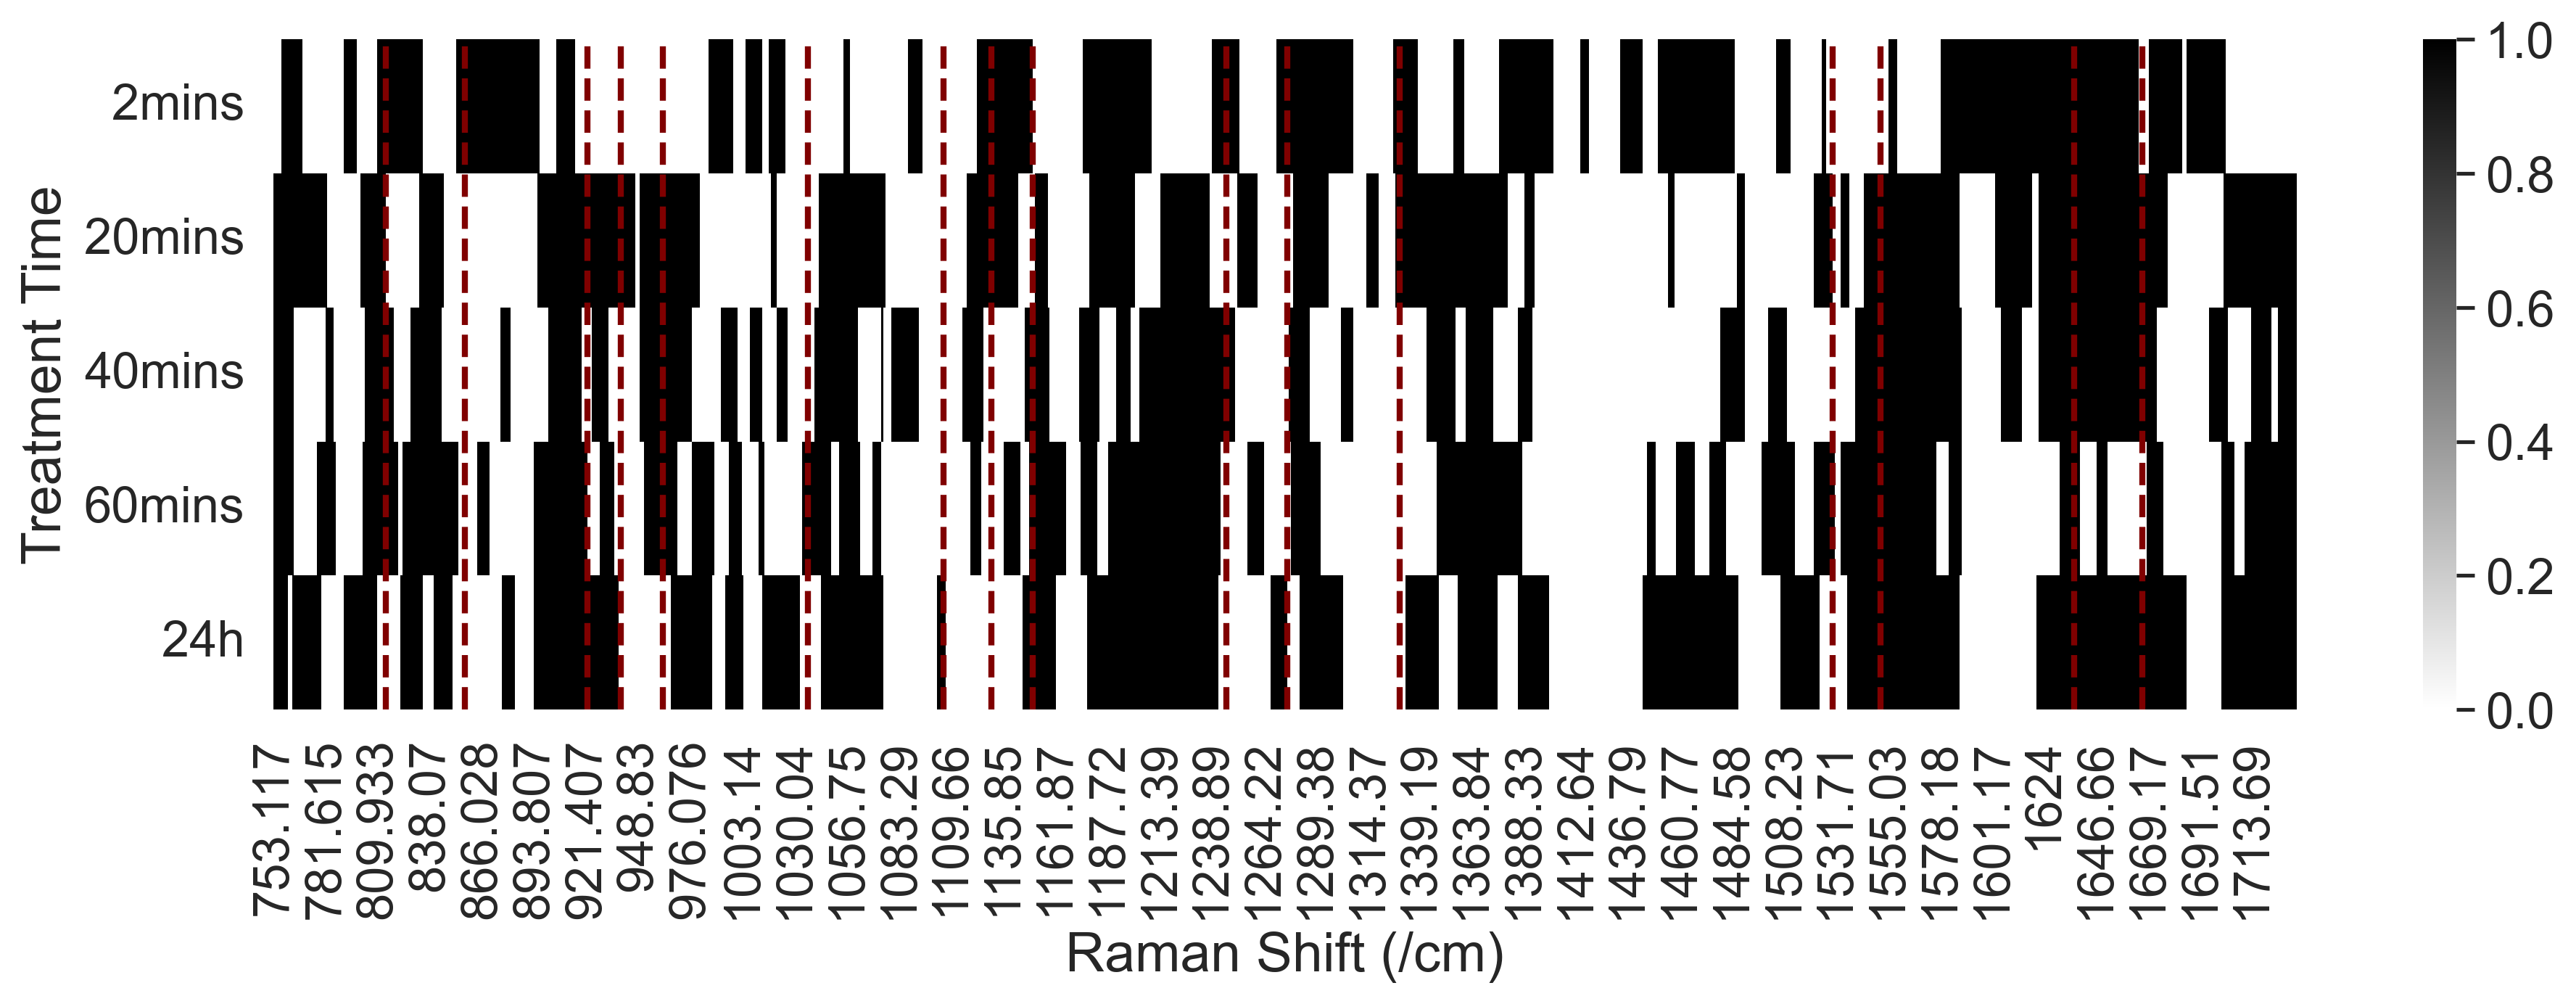

In [90]:
plt.figure(figsize=(15, 4), dpi = 300);
ax = sns.heatmap(
    data =  ld >=  ld.mean(axis=1).mean(),# 0.04,
    cmap='binary'
    );
plt.ylabel('Treatment Time');
plt.xlabel('Raman Shift (/cm)');

for x in [54, 92, 151, 167, 187, 257, 322, 345, 365, 458, 487, 541, 749, 772, 865, 898]:
    ax.axvline(x=x, color = 'maroon', lw = 2, ls = '--')
plt.show()

In [86]:
ld.columns[160:180]

Index([932.398, 933.496, 934.593,  935.69, 936.786, 937.883, 938.978, 940.075,
        941.17, 942.265,  943.36, 944.455, 945.549, 946.643, 947.737,  948.83,
       949.924, 951.016, 952.109, 953.202],
      dtype='object')